In [28]:
dirname = 'D:/TOS_DI-20180411_1414-V7.0.1/workspace/LOCAL_PROJECT/metadata/fileExcel'

import os
files = os.listdir(dirname)

if any(name.endswith('.xlsx') for name in files):
    print(files)
else:
    print('No CSV file found')

['FIME18_order_92_20180604.xlsx', 'Source_Backup', 'STD_FILES', 'Target', 'WIP']


In [2]:
# import libraries

import numpy as np
import pandas as pd

In [3]:
whr15 = pd.read_csv('world-happiness-report_2015.csv')
whr16 = pd.read_csv('world-happiness-report_2016.csv')
whr17 = pd.read_csv('world-happiness-report_2017.csv')

In [4]:
whr15.head(5)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [5]:
whr16.head(5)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [6]:
whr17.head(5)

Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
0       Norway               1            7.537                   7.594445   
1      Denmark               2            7.522                   7.581728   
2      Iceland               3            7.504                   7.622030   
3  Switzerland               4            7.494                   7.561772   
4      Finland               5            7.469                   7.527542   

   Upper Confidence Interval  Economy (GDP per Capita)    Family  \
0                   7.479556                  1.616463  1.533524   
1                   7.462272                  1.482383  1.551122   
2                   7.385970                  1.480633  1.610574   
3                   7.426227                  1.564980  1.516912   
4                   7.410458                  1.443572  1.540247   

   Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
0                  0.796667  0.635423                       0.362012   
1                  0.792566  0.626007                       0.355280   
2                  0.833552  0.627163                       0.475540   
3                  0.858131  0.620071                       0.290549   
4                  0.809158  0.617951                       0.245483   

   Generosity  Dystopia Residual  
0    0.315964           2.277027  
1    0.400770           2.313707  
2    0.153527           2.322715  
3    0.367007           2.276716  
4    0.382612           2.430182

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
whr2015 = whr15[['Country','Region','Happiness Rank','Happiness Score']].rename(columns = {'Happiness Rank':'Happiness Rank15','Happiness Score':'Happiness Score15'})

In [9]:
whr2016 = whr16[['Country','Happiness Rank','Happiness Score']].rename(columns = {'Happiness Rank':'Happiness Rank16','Happiness Score':'Happiness Score16'})

In [10]:
whr2017 = whr17[['Country','Happiness Rank','Happiness Score']].rename(columns = {'Happiness Rank':'Happiness Rank17','Happiness Score':'Happiness Score17'})

In [41]:
whr = pd.merge(pd.merge(whr2015, whr2016, how = 'inner', on = 'Country'), whr2017, how = 'inner', on = 'Country')

In [42]:
whr.head(5)

Country          Region  Happiness Rank15  Happiness Score15  \
0  Switzerland  Western Europe                 1              7.587   
1      Iceland  Western Europe                 2              7.561   
2      Denmark  Western Europe                 3              7.527   
3       Norway  Western Europe                 4              7.522   
4       Canada   North America                 5              7.427   

   Happiness Rank16  Happiness Score16  Happiness Rank17  Happiness Score17  
0                 2              7.509                 4              7.494  
1                 3              7.501                 3              7.504  
2                 1              7.526                 2              7.522  
3                 4              7.498                 1              7.537  
4                 6              7.404                 7              7.316

In [43]:
reshaped_whr = pd.melt(whr, id_vars=['Country'], 
                       value_vars=['Happiness Rank15', 'Happiness Rank16', 'Happiness Rank17'])

In [45]:
reshaped_whr.head(10)

Country          variable  value
0  Switzerland  Happiness Rank15      1
1      Iceland  Happiness Rank15      2
2      Denmark  Happiness Rank15      3
3       Norway  Happiness Rank15      4
4       Canada  Happiness Rank15      5
5      Finland  Happiness Rank15      6
6  Netherlands  Happiness Rank15      7
7       Sweden  Happiness Rank15      8
8  New Zealand  Happiness Rank15      9
9    Australia  Happiness Rank15     10

In [39]:
whr_df = reshaped_whr.pivot(index = 'variable', columns = 'Country', values='value')

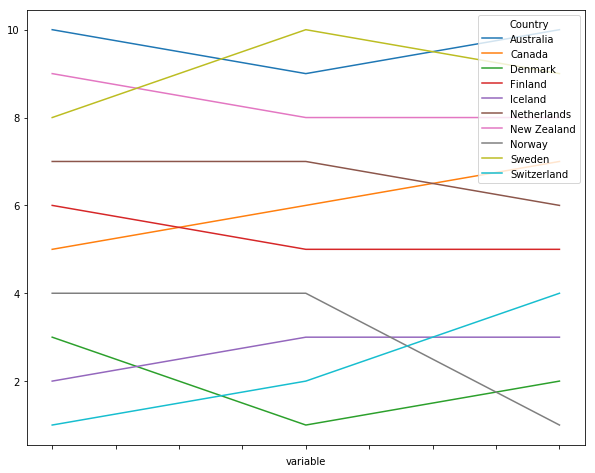

In [40]:
whr_df.plot(figsize=(10,8))

In [46]:
whr_region = whr.groupby(['Region']).mean()[['Happiness Score15','Happiness Score16','Happiness Score17']]

In [47]:
whr_region

Happiness Score15  Happiness Score16  \
Region                                                                  
Australia and New Zealand                 7.285000           7.323500   
Central and Eastern Europe                5.332931           5.370690   
Eastern Asia                              5.496250           5.477000   
Latin America and Caribbean               6.138762           6.056095   
Middle East and Northern Africa           5.330789           5.386053   
North America                             7.273000           7.254000   
Southeastern Asia                         5.372625           5.396750   
Southern Asia                             4.580857           4.563286   
Sub-Saharan Africa                        4.130788           4.070455   
Western Europe                            6.689619           6.685667   

                                 Happiness Score17  
Region                                              
Australia and New Zealand                 7.299000  
Central and Eastern Europe                5.409931  
Eastern Asia                              5.496500  
Latin America and Caribbean               5.957905  
Middle East and Northern Africa           5.369684  
North America                             7.154500  
Southeastern Asia                         5.444875  
Southern Asia                             4.628429  
Sub-Saharan Africa                        4.121182  
Western Europe                            6.703714

In [48]:
whr_region[['Happiness Score15','Happiness Score16','Happiness Score17']].plot(kind = 'bar', figsize = (15,8))

In [4]:

dirname = 'D:/TOS_DI-20180411_1414-V7.0.1/workspace/LOCAL_PROJECT/metadata/fileExcel/SRC_FILES'
backup  = 'D:/TOS_DI-20180411_1414-V7.0.1/workspace/LOCAL_PROJECT/metadata/fileExcel/Source_Backup'

import shutil
import os
import pandas as pd

files = os.listdir(dirname)

if any(name.endswith('.xlsx') for name in files):
    #shutil.copy(dirname, backup)
    #shutil.copy2(os.path.join(subdir, file), target_folder)
    inputFileName = [s for s in files if "FIME" in s]
    str1 = ''.join(inputFileName)
    x=pd.ExcelFile('D:/TOS_DI-20180411_1414-V7.0.1/workspace/LOCAL_PROJECT/metadata/fileExcel/SRC_FILES/'+str1)
    Template = [y for y in x.sheet_names if "FIME" in y]
    str2 = ''.join(Template)
    #print(inputFileName)
    #print(Template)
    pd.set_option('display.max_columns', None)  
    #print(x.sheet_names)
    data=x.parse(str2,header=0)
    #print(data.to_string())
    #print(data.columns)
    #print(data.index)
    data.to_json(dirname+"/src_json.json", orient='table')
    #print(data.sort_index())

else:
    print('No CSV file found')
    
    


In [60]:
import shutil,os

def _shutilsample():
    os.chdir("D:\Py sample")
    if (os.path.exists("D:\\Py sample\\copied")):
       try:
           print("Directory already exists")
       except OSError:
           pass
    else:
         shutil.copytree('.',"D:\\Py sample\\copied")
    if os.path.isfile('D:\\Py sample\\copied\\Dict2.py'):
        try:
            print("File already exists")
        except OSError:
            pass
    else:    
        shutil.copy('.\\Dict.py',"D:\\Py sample\\copied\\Dict2.py")
    print(os.path.isfile('D:\\Py sample\\copied\\Dict2.py')    )